# Chapter 9 - Partial Differential Equations

Typically for partial differntial equations, we could find a valid solution using elementary solution methods, but these methods take too long. Thus, we will cover wasys to arrive at solutions quickly. Some of these will be initial value problems or boundary value problems.

## 9.1 Boundary Value Problems and the Relaxation Method

The method of **finite differences** involves dividing space into a grid of discrete points. The grids may differ for the problem, but the simplest is an ordinary grid. We want to solve

<sup>&part;<sup>2</sup>&Phi;</sup>&frasl;<sub>&part;x<sup>2</sup></sub> + 
<sup>&part;<sup>2</sup>&Phi;</sup>&frasl;<sub>&part;y<sup>2</sup></sub> = 0 and we know

<sup>&part;<sup>2</sup>&Phi;</sup>&frasl;<sub>&part;x<sup>2</sup></sub> = 
<sup> &Phi;(x+a,y) + &Phi;(x-a,y) - 2&Phi;(x,y)</sup> &frasl; <sub>a<sup>2</sup></sub>

<sup>&part;<sup>2</sup>&Phi;</sup>&frasl;<sub>&part;y<sup>2</sup></sub> = 
<sup> &Phi;(x,y+a) + &Phi;(x,y-a) - 2&Phi;(x,y)</sup> &frasl; <sub>a<sup>2</sup></sub>

So we actually want to solve substituting and simplifing

&Phi;(x,y) = <sup>1</sup>&frasl;<sub>4</sub>[&Phi;(x+a,y) + &Phi;(x-a,y) + &Phi;(x,y+a) + &Phi;(x,y-a)]

And we know 

&Phi;'(x,y) = <sup>1</sup>&frasl;<sub>4</sub>[&Phi;(x+a,y) + &Phi;(x-a,y) + &Phi;(x,y+a) + &Phi;(x,y-a)]

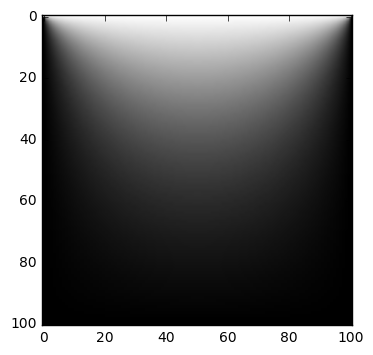

In [14]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
# Make a plot
imshow(phi)
gray()
show()

#### Example 9.2 Solution of the Poisson Equation

### 9.2.1 Overrelaxation

On each iteration of the Jacobi method the values of &Phi one all the grid points converge a little closer to the final values. One way to speed up the process is to overshoot the value for example if 0.1 &rarr; 0.3 on one step, convergine towards 0.5, we could overshoot by making it 0.4. This is done by changing the fraction from 1/4 to (1+&omega;)/4.

### The Gauss-Seidel Method

In this method, we assume each new value is better than the others and do not use the old values to calculate the new ones. We never use the old values &Phi;(x,y) if there are new (better) ones. This methodology has two reasons to utilize: it only uses one array so less memory, and it is faster.

&Phi;(x,y) = <sup>(1+&omega;)</sup>&frasl;<sub>4</sub>[&Phi;(x+a,y) + &Phi;(x-a,y) + &Phi;(x,y+a) + &Phi;(x,y-a)] - &omega;&Phi;(x,y).

We need to chose an optimal value &omega;, which depends on both equations. Larger values of &omega; makes a faster calucation, but too large of an &omega; can become numerically unstable.

#### Exercise 9.2

#### Exercise 9.3

## 9.3 Initial Value Problems

Instead of searching for the equation solution, we are given an initial set of solutions. 

### 9.3.1 The FTCS (Forward-Time Centered-Space) Method

We can rewrite the equation if we do not know where the space ends to

<sup>d&Phi;</sup>&frasl;<sub>dt</sub> = 
<sup>D</sup> &frasl; <sub>a<sup>2</sup></sub>[&Phi;(x+a,y) + &Phi;(x-a,y) - 2&Phi;(x,y)].

Taylor expanding this, we get

&Phi;(x,t+h) = 
h<sup>D</sup> &frasl; <sub>a<sup>2</sup></sub>[&Phi;(x+a,t) + &Phi;(x-a,t) - 2&Phi;(x,t)].


#### Example 9.3 The Heat Equation

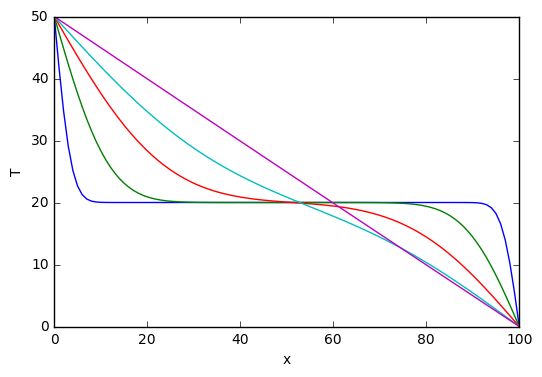

In [3]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T same as new
    ##for i in range(1,N):
    ##    Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    Tp[1:N] = T[1:N] + c*(T[0:N-1]+T[2:N+1] - 2*T[1:N])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)

xlabel("x")
ylabel("T")
show()

#### Exercise 9.4 Thermal diffusion in the Earth's crust

### 9.3.2 Numeric Stability

For the FTCS method, sometimes error term dominate. This failure happens in wave equations. For the FTCS method, it is stable for all k if h&le;<sup>a<sup>2</sup></sup>&frasl;<sub>2D</sub>. If h is larger, then the  solution will diverge. Note: the FTCS method is never stable for the wave equation, and will need a different way to solve the wave equation.

#### Exercise 9.5 FTCS solution of the wave equation

### 9.3.3 The Implicit and Crank-Nicolson Methods

Derived by taking the average of the previous two methods (FTCS and implicit). This is more computationally challenging than both equations previously. This can be viewed as a systme of equations and can be solved using tridiagonal matricies.

### 9.3.4 Spectral Methods

Using the Fast Fourier Transform of the equation, we can write 

&Phi;(x<sub>n</sub>,t) = <sup>1</sup>&frasl;<sub>N</sub> [k=1&rarr;(N-1)] &Sigma; [&alpha;<sub>k</sub>cos(<sup>&pi;vkt</sup>&frasl;<sub>L</sub>) - &eta;<sub>k</sub>sin(<sup>&pi;vkt</sup>&frasl;<sub>L</sub>) ] * sin(<sup>&pi;kn</sup>&frasl;<sub>N</sub>).

This requires a Fourier transform (time: NlogN), which can be long for large data sets. But one thing to note is that one slice can be calculated directly instead of multiple time steps.

#### Exercise 9.6 What would be the equivalent of Eq. 9.7 in three dimensions?

#### Exercise 9.7 The relaxation method for ordinary differential equations

#### Exercise 9.8 the Schrodinger equation and the Crank-Nicolson method

#### Exercise 9.9 The Schrodinger equation and the spectral methods